**Given a dataset with Customer ID, Gender, Age, Annual Income in $ and Spending Score (1-100).**

**Dataset : Mall_Customers.csv**

***Perform the following operations:***

**a)	Open the dataset and display top 5 rows. (5 marks)**

In [40]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [41]:
data = pd.read_csv("../Lab_Exam_Dataset/Mall_Customers.csv")

In [42]:
data.head(5)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**b)	Drop Customer ID and plot a Boxplot of remaining fields in the dataset. (5 marks)**

In [44]:
data.drop(["CustomerID"], axis=1, inplace=True)

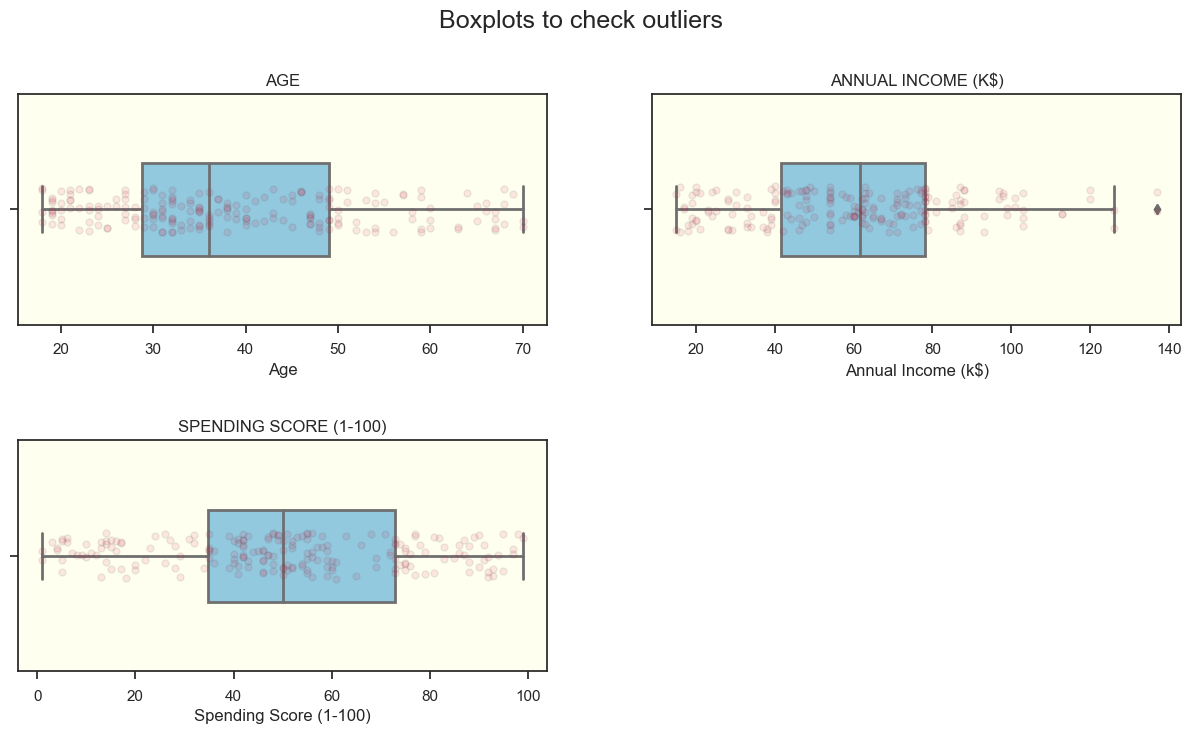

In [45]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Boxplots to check outliers", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(data.select_dtypes(np.number)):
    sns.set(
        style="ticks",  # The 'ticks' style
        rc={
            # "figure.figsize": (6, 9),
            "figure.facecolor": "ivory",
            "axes.facecolor": "ivory",
        },
    )
    # add a new subplot iteratively
    try:
        ax = plt.subplot(3, 2, n + 1)

        # filter df and plot ticker on the new subplot axis
        # df[ticker].plot(ax=ax,kind='box')
        sns.boxplot(
            x=ticker,
            data=data,
            width=0.4,
            color="skyblue",
            linewidth=2,
            showfliers=True,
        )
        sns.stripplot(x=ticker, data=data, color="crimson", linewidth=1, alpha=0.1)
        # chart formatting
        ax.set_title(ticker.upper())
    except:
        pass

In [46]:
def remove_outliers(df, method="cap", threshold=1.5, exclude=[]):
    # Create a copy of the dataframe to avoid modifying the original data
    df_cleaned = df.copy()

    # Select numerical columns
    if len(exclude) > 0:
        numerical_columns = (
            df.select_dtypes(include=[np.number]).drop(exclude, axis=1).columns
        )

    else:
        numerical_columns = df.select_dtypes(include=[np.number]).columns

    # Iterate over each numerical column in the dataframe
    for column in numerical_columns:
        # Calculate the interquartile range (IQR)
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        # Calculate the lower and upper bounds for outliers
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        # Apply the specified method to handle outliers
        if method == "cap":
            # Cap the outliers to the upper and lower bounds
            df_cleaned[column] = df[column].clip(lower_bound, upper_bound)
        elif method == "delete":
            # Remove the outliers from the dataframe
            df_cleaned = df_cleaned[
                (df_cleaned[column] >= lower_bound)
                & (df_cleaned[column] <= upper_bound)
            ]

    return df_cleaned

In [47]:
data = remove_outliers(data)

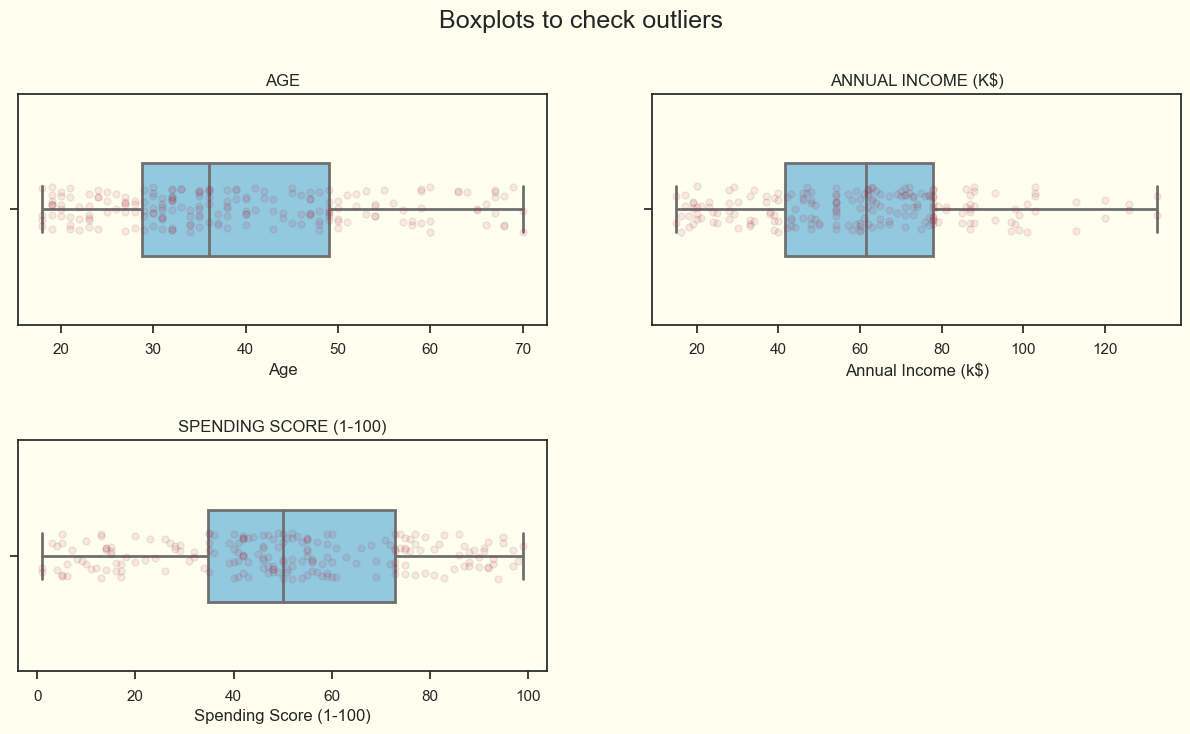

In [48]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Boxplots to check outliers", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(data.select_dtypes(np.number)):
    sns.set(
        style="ticks",  # The 'ticks' style
        rc={
            # "figure.figsize": (6, 9),
            "figure.facecolor": "ivory",
            "axes.facecolor": "ivory",
        },
    )
    # add a new subplot iteratively
    try:
        ax = plt.subplot(3, 2, n + 1)

        # filter df and plot ticker on the new subplot axis
        # df[ticker].plot(ax=ax,kind='box')
        sns.boxplot(
            x=ticker,
            data=data,
            width=0.4,
            color="skyblue",
            linewidth=2,
            showfliers=True,
        )
        sns.stripplot(x=ticker, data=data, color="crimson", linewidth=1, alpha=0.1)
        # chart formatting
        ax.set_title(ticker.upper())
    except:
        pass

**c)	Perform scaling and apply k-means to plot an elbow curve for K value from 1-10. (10 marks)**

In [49]:
# Create label encoder object
encoder = LabelEncoder()

# Fit and transform the column using the encoder
data["Gender"] = encoder.fit_transform(data["Gender"])

# Print the dataframe to see the encoded column
print(data.head())
print(encoder.classes_)
encoder.inverse_transform([0, 1])

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                15.0                      39
1       1   21                15.0                      81
2       0   20                16.0                       6
3       0   23                16.0                      77
4       0   31                17.0                      40
['Female' 'Male']


array(['Female', 'Male'], dtype=object)

In [50]:
X = StandardScaler().fit_transform(data)

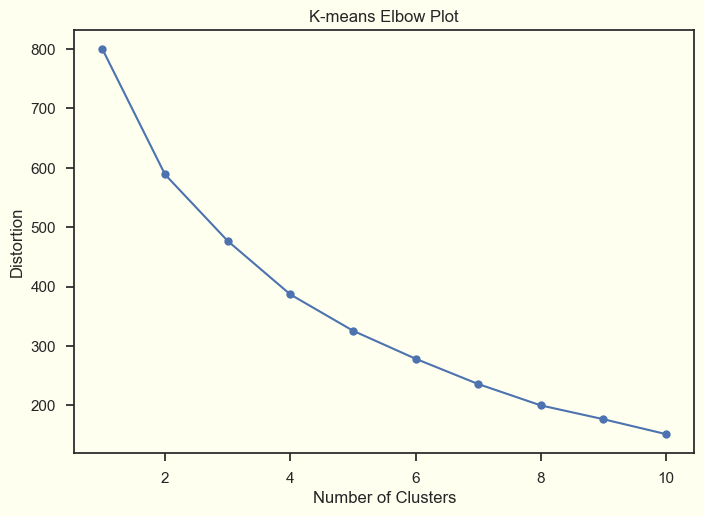

In [51]:
def plot_kmeans_elbow(data, max_clusters):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    # Plotting the elbow curve
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('K-means Elbow Plot')

    plt.show()

plot_kmeans_elbow(X, 10)

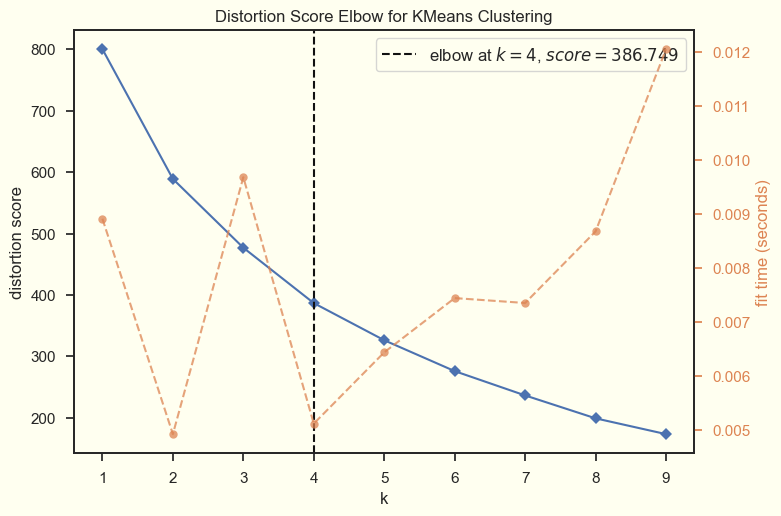

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
KElbowVisualizer(KMeans(), k=(1, 10)).fit(X).show()

**d)	Try to calculate Silhouette Score value for the K value from 2-10. (10 marks)**

In [53]:
def calculate_silhouette_scores(data, min_clusters, max_clusters):
    silhouette_scores = []

    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        kmeans.fit(data)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)
        print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    return silhouette_scores


scores = calculate_silhouette_scores(X, 2, 10)


For n_clusters = 2 The average silhouette_score is : 0.25161813326917815
For n_clusters = 3 The average silhouette_score is : 0.26163426434248616
For n_clusters = 4 The average silhouette_score is : 0.3013488915774204
For n_clusters = 5 The average silhouette_score is : 0.3169861392161084
For n_clusters = 6 The average silhouette_score is : 0.32969972339975245
For n_clusters = 7 The average silhouette_score is : 0.35821420826836003
For n_clusters = 8 The average silhouette_score is : 0.39061549554625913
For n_clusters = 9 The average silhouette_score is : 0.40320858470335463
For n_clusters = 10 The average silhouette_score is : 0.4210582569097443


**e)	Use Silhouette Visualizer to plot for an optimal K value. (5 marks)**

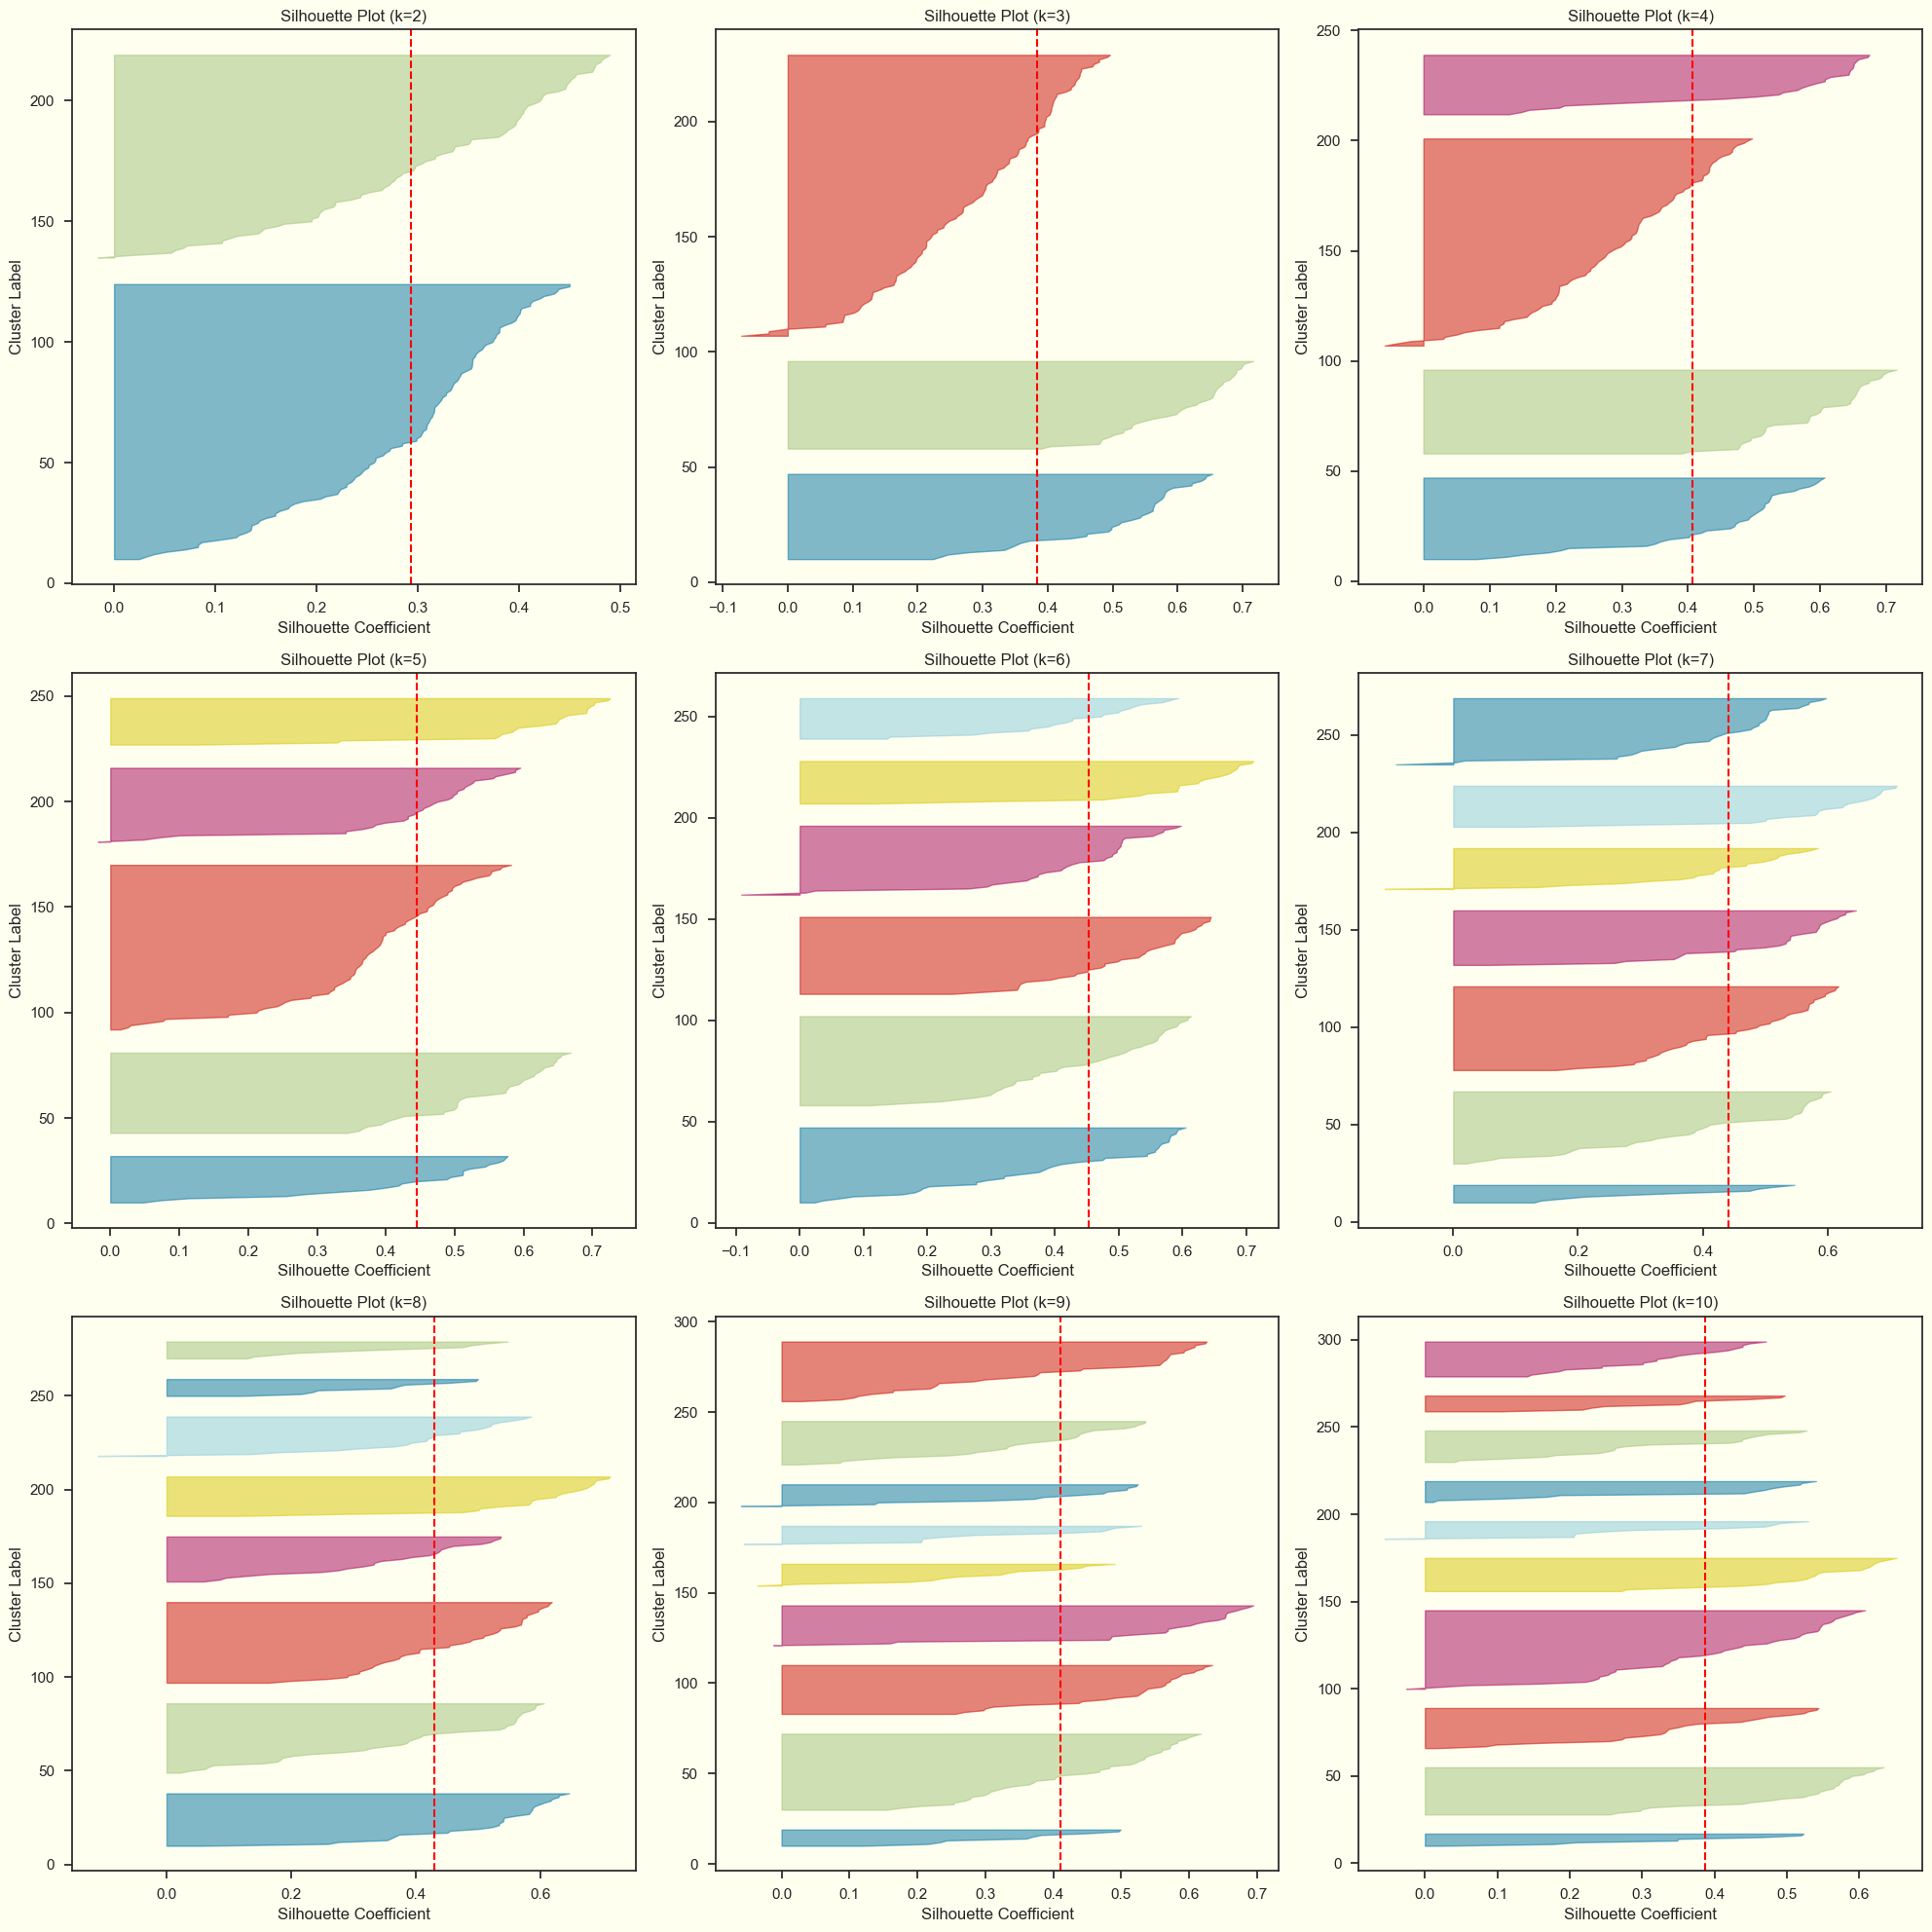

Optimal k value: 6


In [54]:
def plot_kmeans_silhouette(data, min_clusters, max_clusters):
    num_plots = max_clusters - min_clusters + 1
    num_rows = int(np.sqrt(num_plots))
    num_cols = int(np.ceil(num_plots / num_rows))

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))
    axs = axs.flatten()  # Flatten the axes array to simplify indexing

    avg_silhouette_scores = []

    for n_clusters in range(min_clusters, max_clusters + 1):
        index = n_clusters - min_clusters

        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=axs[index])
        visualizer.fit(data)

        axs[index].set_title(f"Silhouette Plot (k={n_clusters})")
        axs[index].set_xlabel("Silhouette Coefficient")
        axs[index].set_ylabel("Cluster Label")

        # Compute average silhouette score
        silhouette_avg = silhouette_score(data, kmeans.labels_)
        avg_silhouette_scores.append(silhouette_avg)

    # Hide extra subplots
    for i in range(num_plots, len(axs)):
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

    # Find the optimal k value
    optimal_k = min_clusters + np.argmax(avg_silhouette_scores)
    print(f"Optimal k value: {optimal_k}")

plot_kmeans_silhouette(data, 2, 10)


In [55]:
# Perform K-means based on K=6
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X)
data['labels'] =kmeans.labels_

<Figure size 2000x1800 with 0 Axes>

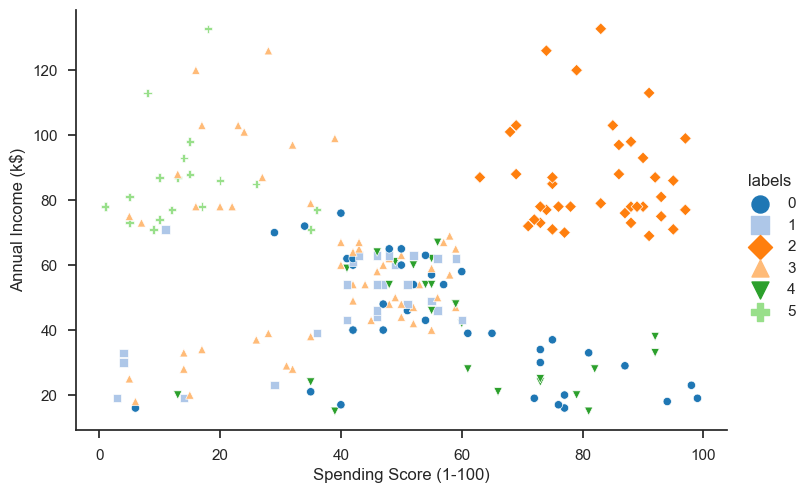

In [56]:
# Define the icons for different labels
markers = ['o', 's', 'D', '^', 'v','P','p','H','X','*']

plt.figure(figsize=(20, 18))
sns.set(style='ticks')

# Create the pair plot with different icons for different labels
g = sns.pairplot(data, x_vars=['Spending Score (1-100)'], y_vars=['Annual Income (k$)'], hue='labels', height=5, aspect=1.5,
                 palette='tab20', markers=markers)

# Customize the legend with the appropriate markers
for i, label in enumerate(data['labels'].unique()):
    marker = markers[i]
    g._legend.legendHandles[i]._sizes = [150]
    g._legend.legendHandles[i]._marker = marker

plt.show()
